##### 31. Coin Sums
En uk hay monedas de valor 1,2,5,10,20,50,100,200. De cu'antas formas se puede llegar a 200 pesos?

In [1]:
monedas = [1,2,5,10,20,50,100,200]

#podemos hacer un algoritmo dinamico
# Sea formas[i] el numero de formas en las que se puede sumar i. 


formas = 201*[0]
#el numero de formas de conseguir 0 pesos es 1
formas[0]=1


# para cada otro numero
for i in range(1,10):
    # primero el valor es 0
    valori=0
    #luego, es igual al numero de formas de llegar a i-coin para cada coin
    #todas sumadas
    for coin in monedas:
        if i >= coin:
            valori = valori + formas[i-coin]
    formas[i] = valori
            
print(formas)
'''No funciona, porque esta contando el numero de formas de conseguir el valor
pero contando doble posibles reordenamientos'''



[1, 1, 2, 3, 5, 9, 15, 26, 44, 75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'No funciona, porque esta contando el numero de formas de conseguir el valor\npero contando doble posibles reordenamientos'

Vamos a usar un arreglo 2d como sigue
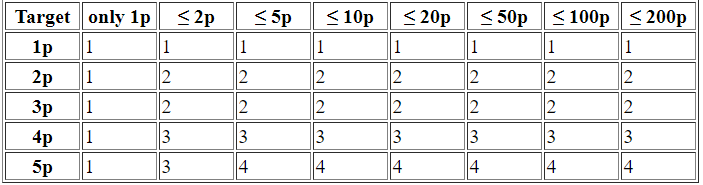

In [2]:
''' Necesitamos un dynamic algorithm pero de dos dimensions'''
import numpy as np

#formas[i,j] es la cantidad de formas de llegar a i pesos usando solo las 
#primeras j monedas 

monedas = [1,2,5,10,20,50,100,200]
formas = np.zeros((202,len(monedas)))

#hay una forma de conseguir 1 peso, sin importar cuantas monedas usemos.
for j in range(len(monedas)):
    formas[1,j] = 1
    

for i in range(1,202):
    for j in range(len(monedas)):
        # el numero de formas de conseguir es igual a que si no tuvieramos la 
        #ultima moneda
        formas[i,j] = formas[i,j-1]
        # pero como si la tenemos,
        # vemos si esta ultima moneda nos es util.
        if monedas[j] <= i:
            formas[i][j] += formas[i-monedas[j]][j]
    
# el numero de formas de conseguir i pesos con j monedas
#es igual al numero de formas de conseguir i pesos con j-1 monedas
# mas el numero de formas de conseguir i-moneda_j pesos con j monedas.

#Es decir, para calcular formas[i][j], hay dos opciones, usamos la ultima moneda
#(la moneda j) o no la usamos. Si no la usamos, el numero de formas de sumar i
# es formas[i,j-1].
#si s'i la usamos, para que se pueda usar, debe de cumplir monedas_j <= i. 
# En tal caso, el numero de formas de llegar a i pesos usando las j monedas
# es igual a el numero de formas de llegar a i-j pesos usando las j monedas, 
# porque sabemos que el dinero restante sera la moneda j.



print(formas[-1][-1])

73682.0


#### 32. Pandigital product
Podemos escribir 39 * 186 = 7254 y vemos que es un producto que incluye todos los digitos 123456789. Buscamos todos los productos de este tipo <br> 

El producto tiene que ser de un numero de dos digitos por uno de 3, porque de otra forma no alcanzarian los digitos o sobrarian 

In [29]:
# a es el numero de 2 digitos
# b es el de 3 digitos

def checa23(a,b):
    c = a*b 
    a = str(a)
    b = str(b)
    c = str(c)
    
    if b[0] == a[0] or b[1] == a[0] or b[2] == a[0]:
        return(False)
    elif b[0] == a[1] or b[1] == a[1] or b[2] == a[1]:
        return(False)
    if len(c) != 4:
        return(False)
    
    num = a+b+c
    
    lis = set()
    digs = set([1,2,3,4,5,6,7,8,9])
    for i in range(len(num)):
        lis.add(int(num[i]))
    if lis == digs:
        return(True)
    return(False)
    
    
res =[]
for a in range(10,99):
    for b in range(102,999):
        if checa23(a,b) == True:
            res.append([a,b])
print(res)


    
    

[[12, 483], [18, 297], [27, 198], [28, 157], [39, 186], [42, 138], [48, 159]]


In [30]:
suma = 0
prods=[]
for prod in res:
    prods.append(prod[0]*prod[1])
print(prods)
print(sum(prods))
prods = set(prods)
print(prods)
print(sum(prods))

[5796, 5346, 5346, 4396, 7254, 5796, 7632]
41566
{5346, 5796, 4396, 7632, 7254}
30424


## 33. Digit cancelling

49/98 se puede resolver tontamente al cancelar los 9 dando como resultado el correcto 4/8. <br>
Buscamos todos los resultados de este tipo con denominador y numerador de dos digitos

In [58]:
def checa(a,b):
    sa = list(str(a))
    sb = list(str(b))
    abint = set(sa).intersection(set(sb))

    if len(abint) == 0:
        return(False)
    elem = abint.pop()
    #print("interse", elem)
    
    sa.remove(elem)
    sb.remove(elem)
    
    #print(sa)
    #print(sb)
    
    if int(sb[0]) != 0 and int(sa[0]) / int(sb[0]) == a/b:
        return(True)
    return(False)
    
checa(49,98)

res=[]
for a in range(10,100):
    for b in range(10,100):
        if a != b: 
            if checa(a,b) == True:
                res.append([a,b])
print(res)

[[10, 20], [10, 30], [10, 40], [10, 50], [10, 60], [10, 70], [10, 80], [10, 90], [16, 64], [19, 95], [20, 10], [20, 30], [20, 40], [20, 50], [20, 60], [20, 70], [20, 80], [20, 90], [26, 65], [30, 10], [30, 20], [30, 40], [30, 50], [30, 60], [30, 70], [30, 80], [30, 90], [40, 10], [40, 20], [40, 30], [40, 50], [40, 60], [40, 70], [40, 80], [40, 90], [49, 98], [50, 10], [50, 20], [50, 30], [50, 40], [50, 60], [50, 70], [50, 80], [50, 90], [60, 10], [60, 20], [60, 30], [60, 40], [60, 50], [60, 70], [60, 80], [60, 90], [64, 16], [65, 26], [70, 10], [70, 20], [70, 30], [70, 40], [70, 50], [70, 60], [70, 80], [70, 90], [80, 10], [80, 20], [80, 30], [80, 40], [80, 50], [80, 60], [80, 70], [80, 90], [90, 10], [90, 20], [90, 30], [90, 40], [90, 50], [90, 60], [90, 70], [90, 80], [95, 19], [98, 49]]


In [60]:
a1 = 16/64
a2 = 19/95
a3 = 26/65
a4 = 49/98

print(a1*a2*a3*a4)

0.010000000000000002


## 34. Sum Factoriales
Encuentra todos los numeros que son iguales a las sumas de sus factoriales. Como por ejemplo 145 = 1! + 4! + 5!

In [67]:
import math

res = []
for i in range(10,1000000):
    si = str(i)
    fact=0
    for l in si:
        fact = fact+ math.factorial(int(l))
    if fact == i:
        res.append(i)

print(res)

[145, 40585]


## 35. primos ciclicos
197 es un primo ciclico porqeu 197, 971, 719 son primos. Encuentra todos los primos ciclicos que hay menores a 100000

In [112]:
# Importamos una libreria de primos
import sympy

# primero vemos cuales son todos los primos
losprimos = list(sympy.primerange(1,1000000))

# vuelta hace una permutacion ciclica a n.
def vuelta(n):
    sa = str(n)
    l = len(sa)
    nuevo =sa[-1]
    for i in range(l-1):
        nuevo = nuevo  + sa[i]
    return(int(nuevo))


#resultado es un set para evitar repetidos
res=set([])

# para cada primo
for i in losprimos:
    # lo guardamos en p
    p =i
    # definimos mal=0
    mal=0
    
    # vamos a dar len(str(i))-1 vueltas
    for j in range(len(str(i))-1):
        # damos una vuelta y redefinimos p
        p = vuelta(p)
        # si la vuelta no es prima, rompemos el for y ponemos que estuvo mal
        if sympy.isprime(p) == False:
            mal =1
            break
    #si mal == 0, significa que nunca se rompio el for y por tanto, es primo ciclico
    if mal == 0:
        #print("add",i)
        res.add(i)
        
print(res)
print(len(res))
            

{7937, 2, 3, 131, 5, 391939, 7, 11, 1931, 13, 17, 193939, 919, 93719, 31, 9377, 11939, 999331, 37, 993319, 1193, 99371, 3119, 311, 71993, 91193, 939193, 19391, 393919, 3779, 197, 71, 199, 73, 971, 79, 719, 337, 37199, 39119, 933199, 93911, 733, 991, 9311, 97, 19937, 331999, 919393, 113, 7793, 373, 319993, 199933, 939391}
55


3
